In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
data=pd.read_csv("loan_data.csv",low_memory=False)
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
#shape of the data
data.shape

(9578, 14)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [5]:
data.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [6]:
## none of the columns have null values

In [7]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [8]:
## the column 'purpose' is a categorical column and has to be converted into numerical column

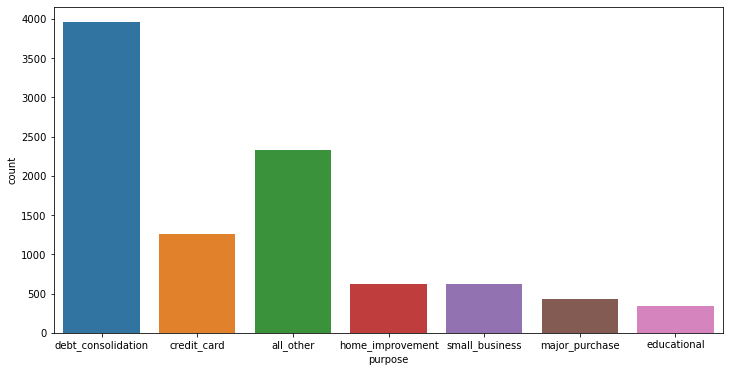

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='purpose')
plt.show()

In [10]:
data["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [11]:
## debt_consolidation has the highest frequency in the purpose column

In [12]:
# transforming categorical data to numerical data
data=pd.get_dummies(data,columns=["purpose"])
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [14]:
data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

### EXPLORATORY DATA ANALYSIS

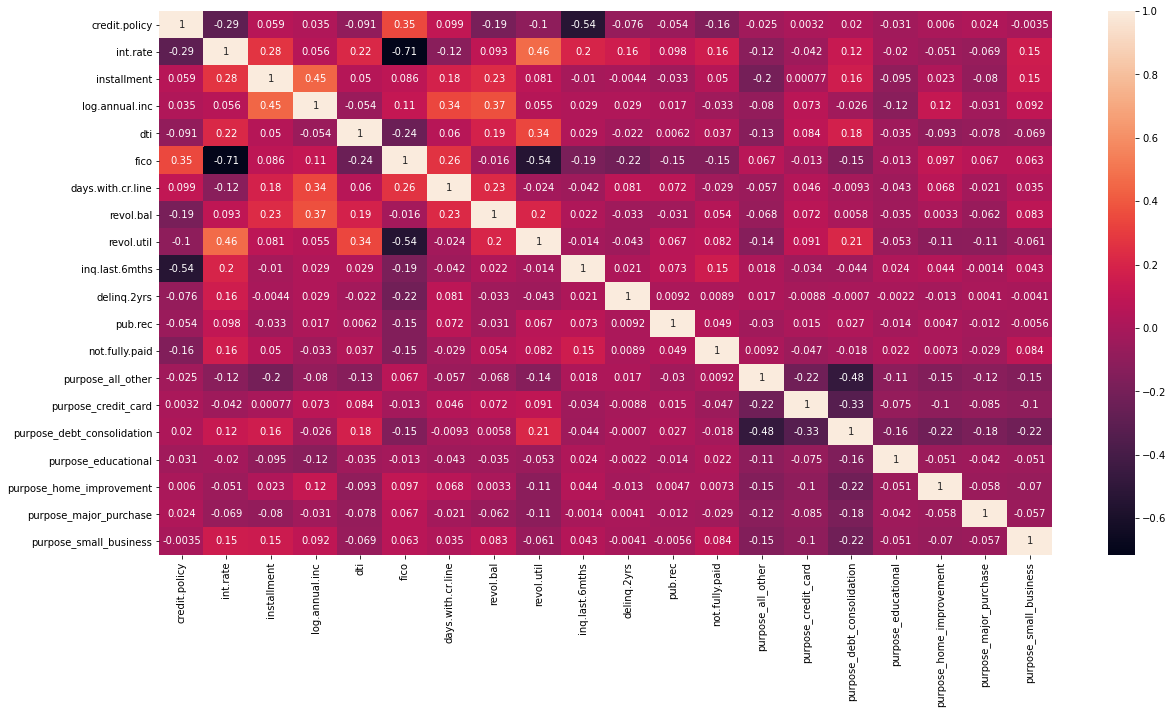

In [15]:
# finding the correlation among the features
plt.figure(figsize=(20,10))
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [16]:
## we can observe that since there are no two features that have a correlation more than 0.7, we won't be dropping any of the features

#### Splitting the data

In [17]:
X=data.drop("not.fully.paid",axis=1)
y=data["not.fully.paid"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=123)

#### Feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
print(X_train.shape)
print(X_test.shape)

(7183, 19)
(2395, 19)


### BUILDING DEEP LEARNING MODEL

In [20]:
#import the required libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
model = Sequential()

model.add(Dense(units = 128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 64, activation = 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 32, activation = 'relu'))          
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 1, activation = 'sigmoid'))

In [22]:
model.compile(optimizer = Adam(learning_rate = 0.01),
 loss = 'binary_crossentropy',
 metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [24]:
es = EarlyStopping(monitor = "accuracy", patience = 4)

#### Model Training 

In [25]:
result=model.fit(X_train,y_train,
                validation_data=(X_test,y_test),
                callbacks=[es],
                epochs=100)

Epoch 1/100
225/225 [==============================] - 6s 10ms/step - loss: 0.4595 - accuracy: 0.8224 - val_loss: 0.4284 - val_accuracy: 0.8330
Epoch 2/100
225/225 [==============================] - 2s 8ms/step - loss: 0.4214 - accuracy: 0.8409 - val_loss: 0.4252 - val_accuracy: 0.8351
Epoch 3/100
225/225 [==============================] - 2s 8ms/step - loss: 0.4170 - accuracy: 0.8414 - val_loss: 0.4217 - val_accuracy: 0.8342
Epoch 4/100
225/225 [==============================] - 2s 8ms/step - loss: 0.4138 - accuracy: 0.8421 - val_loss: 0.4200 - val_accuracy: 0.8338
Epoch 5/100
225/225 [==============================] - 2s 8ms/step - loss: 0.4129 - accuracy: 0.8416 - val_loss: 0.4193 - val_accuracy: 0.8338
Epoch 6/100
225/225 [==============================] - 2s 8ms/step - loss: 0.4112 - accuracy: 0.8414 - val_loss: 0.4178 - val_accuracy: 0.8338
Epoch 7/100
225/225 [==============================] - 1s 5ms/step - loss: 0.4088 - accuracy: 0.8421 - val_loss: 0.4294 - val_accuracy: 0.833

### Accuracy of the model is around 84%

In [29]:
y_pred = model.predict(X_test) >= 0.5

#### Model Testing

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[1997,  398],
       [   0,    0]], dtype=int64)

In [32]:
#save the model
model.save("LoanModel.h5")

In [33]:
#load the model
from tensorflow.keras.models import load_model
loanModel=load_model("LoanModel.h5");

In [37]:
loanModel.predict(X_test).argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)